# Лабораторная работа 3

Целью данного задания является ознакомление с основными методами понижения размерностей, первичной оценкой кластеризации и кластеризацией.
Данные: Представленные данные отображают поведение 8950 активных держателей кредитных карт за последние 6 месяцев. В датасете представлены 18 подведенческих признаков клиента.

Задача: Необходимо разработать сегментацию клиентов для определения маркетинговой стратегии.

Подробнее о данных: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

1. Необходимо загрузить данные.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('CC GENERAL.csv')

In [3]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Изучить признаки, представленные в датасете. Определить какой тип признаков (категориальные, текстовые, числовые).

Категориальные: BALANCEFREQUENCY, PURCHASESFREQUENCY, ONEOFFPURCHASESFREQUENCY, PURCHASESINSTALLMENTSFREQUENCY, CASHADVANCEFREQUENCY

Текстовые: -

Числовые: BALANCE, PURCHASES, ONEOFFPURCHASES, INSTALLMENTSPURCHASES, CASHADVANCE, CASHADVANCETRX, PURCHASESTRX, CREDITLIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRCFULLPAYMENT, TENURE

Определить, есть ли в датасете пропуски, если есть, то по одной из стратегий произвести чистку данных.

In [4]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace = True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace = True)

2. Построить графики распределения для каждого признака (библиотека seaborn - sns.displot / plt.hist) и

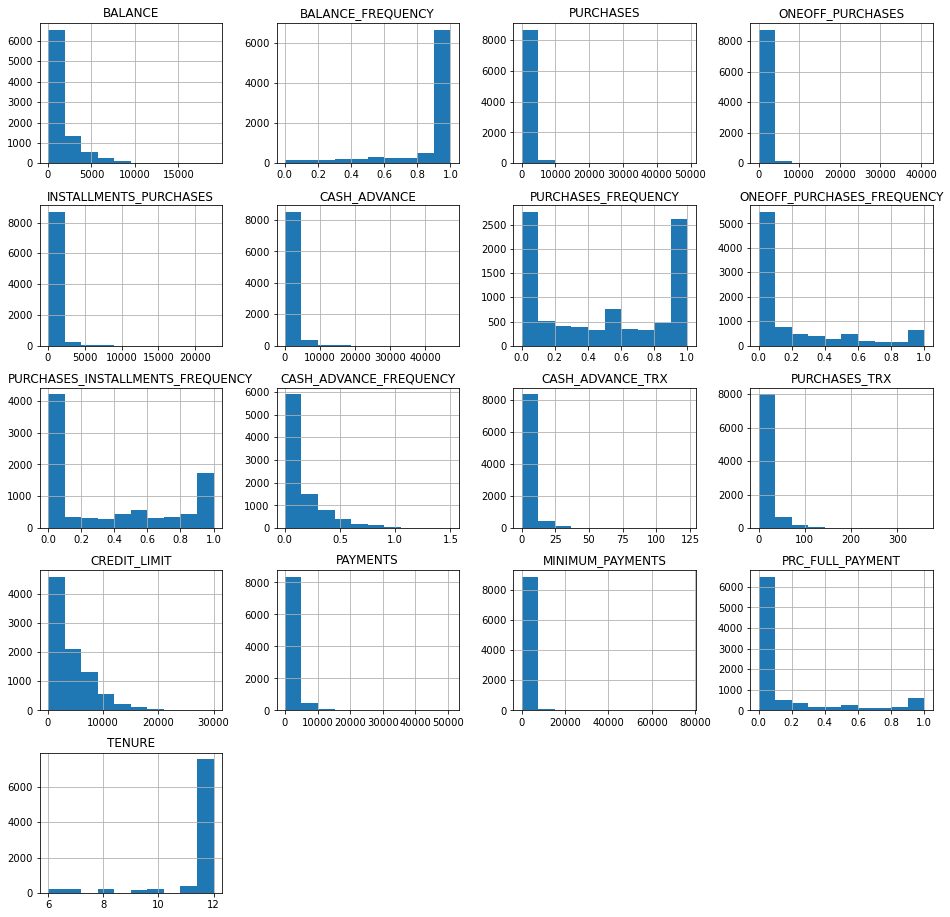

In [6]:
histograms = data.hist(figsize=(16,16))

Для большинства типов данных распределение экспоненциальное, за исключением PURCHASES_FREQUENCY и PURCHASES_INSTALLMENTS_FREQUENCY - многовершинное???

3. Необходимо отнормировать признаки. Для числовых - по одной из стратегий (MinMax, StandartScaler и др.). 

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
num_cols = data[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']].columns
data[num_cols].describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,592.437371,411.067645,978.871112,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,2136.634782,1659.887917,904.338115,2097.163877,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,39.635000,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,361.280000,38.000000,89.000000,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1110.130000,577.405000,468.637500,1113.821139,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,49039.570000,40761.250000,22500.000000,47137.211760,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
ss = StandardScaler()
data[num_cols] = ss.fit_transform(data[num_cols])
data[num_cols].describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,4.195651e-16,-9.278518e-16,3.916048e-15,2.275424e-15,5.697020e-15,-7.151821e-16,-3.570713e-15,-5.142466e-15,-3.264056e-16,1.873114e-17,-2.199184e-15,1.556446e-14
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-4.695519e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-4.760698e-01,-5.917959e-01,-1.221536e+00,-5.986883e-01,-3.708230e-01,-5.255510e-01,-4.122768e+00
25%,-6.900078e-01,-4.510006e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-4.760698e-01,-5.515646e-01,-7.955261e-01,-4.662913e-01,-2.975162e-01,-5.255510e-01,3.606795e-01
50%,-3.320286e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01,-4.667856e-01,-4.760698e-01,-3.101767e-01,-4.107426e-01,-3.026846e-01,-2.268130e-01,-5.255510e-01,3.606795e-01
75%,2.352559e-01,5.004652e-02,-9.056763e-03,6.366321e-02,6.435242e-02,1.100739e-01,9.213645e-02,5.512163e-01,5.802976e-02,-4.390474e-16,-3.712234e-02,3.606795e-01
max,8.397489e+00,2.248351e+01,2.420107e+01,2.442689e+01,2.201112e+01,1.754785e+01,1.381101e+01,7.010083e+00,1.692228e+01,3.241509e+01,2.893453e+00,3.606795e-01


Для категориальных - применить LabelEncoder / OneHotEncoder.

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
cat_cols = data[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']].columns

In [12]:
data[cat_cols].apply(LabelEncoder().fit_transform)

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY
0,35,7,0,1,0
1,41,0,0,0,11
2,42,46,46,0,0
3,27,1,1,0,1
4,42,1,1,0,0
...,...,...,...,...,...
8945,42,46,0,39,0
8946,42,46,0,39,0
8947,36,39,0,31,0
8948,36,0,0,0,7


4. С помощью алгоритмов понижения размерности (PCA, LDA, T-SNE и др.) необходимо отобразить все признаки в двумерном виде. Выбрать лучшее представление (кластеры могут быть различимы).

In [13]:
data1 = data.drop('CUST_ID' , axis='columns')

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(data1) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-1.516056,-0.604323
1,0.242892,2.355275


In [46]:
X_principal

,P1,P2
0,-1.516056,-0.604323
1,0.242892,2.355275
2,-0.032621,0.001682
3,-0.162901,0.039182
4,-1.412693,-0.352323
...,...,...
8945,-1.451056,-1.230376
8946,-1.545443,-0.675267
8947,-1.683030,-0.914181
8948,-1.986966,-0.552799


5. С помощью стастистики Хопкинса рассчитать тенденцию к кластеризации. Сделать вывод о тенденции.

In [18]:
from random import sample
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors

In [19]:
def hopkins_statistic(X):
    
    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
    
    
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
   
    
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    
 
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H
    
    

In [20]:
H=hopkins_statistic(data1)
print(H)

0.9739388427965111


In [21]:
l = [] #list to hold values for each call
for i in range(20):
    H=hopkins_statistic(data1)
    l.append(H)
#print average value:
np.mean(l)

0.9720562958764543

значения между {0.7, ..., 0.99} — в данных наблюдается кластерная тенденция

6. На алгоритмах кластеризации (KMeans, Birch, GaussianMixture, AgglomerativeClustering и др.) необходимо обучить модели, получить лейблы(лейблы = модель.fit_transform(...)). Количество кластеров необходимо подобрать.

In [22]:
y = data['CUST_ID']

In [23]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

## K-means

In [25]:
from sklearn.cluster import KMeans

In [62]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(data1)
    preds = km.predict(data1)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(data1)))
    km_scores.append(-km.score(data1))
    
    silhouette = silhouette_score(data1,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(data1,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)


Score for number of cluster(s) 2: -93545.28086071007
Silhouette score for number of cluster(s) 2: 0.45781515813222046
Davies Bouldin score for number of cluster(s) 2: 1.78491441304381
V-measure score for number of cluster(s) 2: 0.08643199892609212
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


Score for number of cluster(s) 3: -80557.63076983017
Silhouette score for number of cluster(s) 3: 0.3742603378483182
Davies Bouldin score for number of cluster(s) 3: 1.4497513224400091
V-measure score for number of cluster(s) 3: 0.12460377058251475
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Score for number of cluster(s) 4: -72748.1146295545
Silhouette score for number of cluster(s) 4: 0.26879087703650667
Davies Bouldin score for number of cluster(s) 4: 1.5191233729662297
V-measure score for number of cluster(s) 4: 0.1897296781890196
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Score for number of cluster(s) 5: -65732.64420112471
Silhouette score for number of cluster(s) 5: 0.3277826374142987
Davies Bouldin score for number of cluster(s) 5: 1.240120795812539
V-measure score for number of cluster(s) 5: 0.19297785186447564
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Score for number of cluster(s) 6: -59322.43198385817
Silhouette score for number of cluster(s) 6: 0.2925238060481989
Davies Bouldin score for number of cluster(s) 6: 1.226019947993622
V-measure score for number of cluster(s) 6: 0.2373041751612115
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Score for number of cluster(s) 7: -54665.574294839345
Silhouette score for number of cluster(s) 7: 0.30067321806682945
Davies Bouldin score for number of cluster(s) 7: 1.142338881996285
V-measure score for number of cluster(s) 7: 0.24241000543970465
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Score for number of cluster(s) 8: -51091.152541824704
Silhouette score for number of cluster(s) 8: 0.2936966230260883
Davies Bouldin score for number of cluster(s) 8: 1.1892143903655037
V-measure score for number of cluster(s) 8: 0.26197857538913816
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Score for number of cluster(s) 9: -47955.702640762116
Silhouette score for number of cluster(s) 9: 0.27110445330601673
Davies Bouldin score for number of cluster(s) 9: 1.2582330598480773
V-measure score for number of cluster(s) 9: 0.2917786751662434
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Score for number of cluster(s) 10: -45933.545397025264
Silhouette score for number of cluster(s) 10: 0.23875064930113354
Davies Bouldin score for number of cluster(s) 10: 1.3363108812010558
V-measure score for number of cluster(s) 10: 0.30635432840814014
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Score for number of cluster(s) 11: -44080.9629924535
Silhouette score for number of cluster(s) 11: 0.22424927708415934
Davies Bouldin score for number of cluster(s) 11: 1.3614591107064056
V-measure score for number of cluster(s) 11: 0.3312658110879346
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


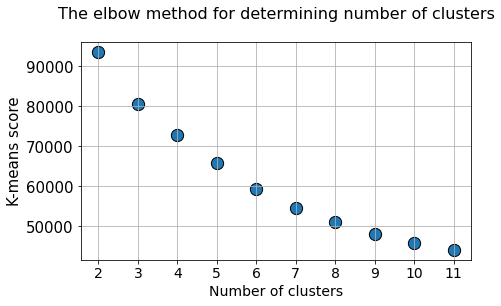

In [27]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

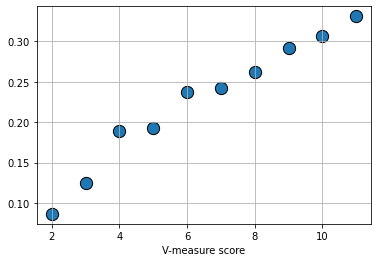

In [28]:
plt.scatter(x=[i for i in range(2,12)],y=vmeasure_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("V-measure score")
plt.show()

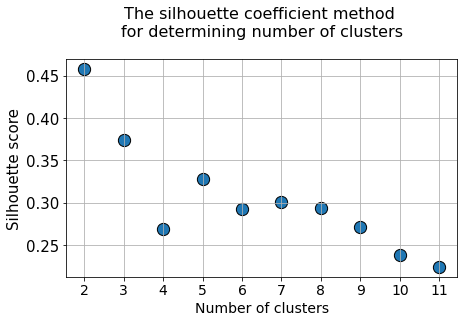

In [29]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()


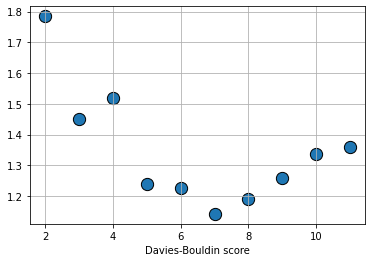

In [30]:
plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

In [94]:
km= KMeans(5)
km.fit(X_principal)
X_kpca = X_principal
y_pred = km.predict(X_kpca)

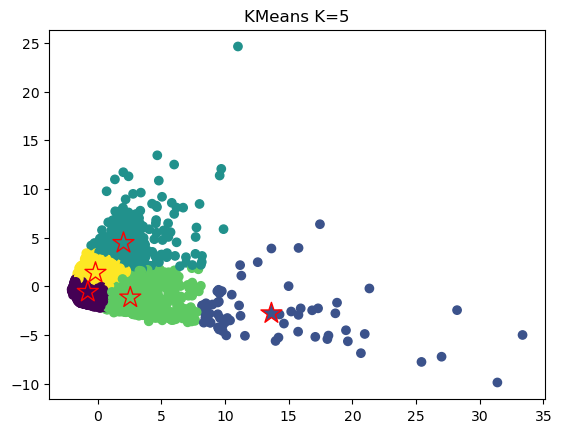

In [96]:
plt.scatter(X_kpca.iloc[:,0], X_kpca.iloc[:,1], c=y_pred)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c=[0,1,2,3,4] , marker="*", edgecolors="red", s=250 )

plt.title("KMeans K=5")
plt.show() 

## Gaussian-Mixture

In [33]:
from sklearn.mixture import GaussianMixture

In [34]:
X_scaled = data1
gm_bic= []
gm_score=[]
for i in range(2,12):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))

BIC for number of cluster(s) 2: 24305.370425357014
Log-likelihood score for number of cluster(s) 2: -1.1844956436153251
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -216749.89083603912
Log-likelihood score for number of cluster(s) 3: 12.369206041754682
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -270879.6025144099
Log-likelihood score for number of cluster(s) 4: 15.480139593994782
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -291773.09269709815
Log-likelihood score for number of cluster(s) 5: 16.73430099563809
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -344760.7284030571
Log-likelihood score for number of cluster(s) 6: 19.781431420927806

C:\Users\lenov\AppData\Local\Temp\ipykernel_1952\3517600152.py:3: RuntimeWarning: invalid value encountered in log
  plt.scatter(x=[i for i in range(2,12)],y=np.log(gm_bic),s=150,edgecolor='k')


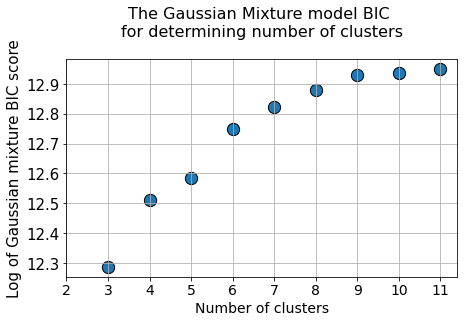

In [35]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()



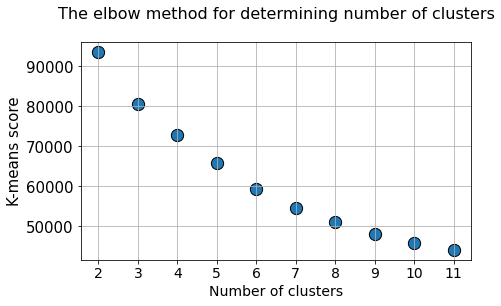

In [37]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

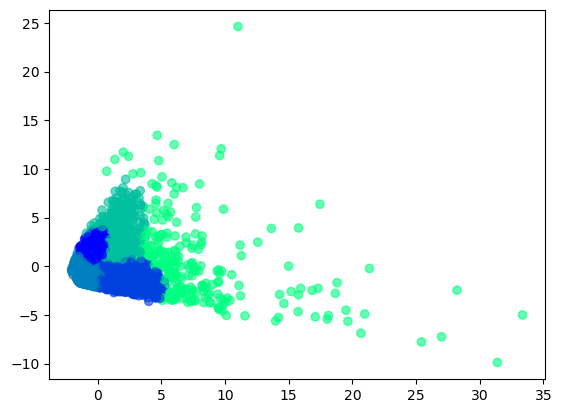

In [97]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GaussianMixture(n_components = 5).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.6) 
plt.show() 

## Birch

In [89]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = Birch(n_clusters=i).fit(data1)
    preds = km.predict(data1)
    
    silhouette = silhouette_score(data1,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(data1,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

Silhouette score for number of cluster(s) 2: 0.6091769529784087
Davies Bouldin score for number of cluster(s) 2: 1.1782922808752438
V-measure score for number of cluster(s) 2: 0.02955547146299376
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


Silhouette score for number of cluster(s) 3: 0.40090958129128507
Davies Bouldin score for number of cluster(s) 3: 1.3472906748961382
V-measure score for number of cluster(s) 3: 0.09062287505823625
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Silhouette score for number of cluster(s) 4: 0.40248028439744826
Davies Bouldin score for number of cluster(s) 4: 1.2346764285985812
V-measure score for number of cluster(s) 4: 0.09238735140775642
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Silhouette score for number of cluster(s) 5: 0.41032253762594123
Davies Bouldin score for number of cluster(s) 5: 1.1846336770989536
V-measure score for number of cluster(s) 5: 0.10312060882559447
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Silhouette score for number of cluster(s) 6: 0.20102531760481365
Davies Bouldin score for number of cluster(s) 6: 1.4331440324663214
V-measure score for number of cluster(s) 6: 0.20558280010208083
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Silhouette score for number of cluster(s) 7: 0.20840614796120085
Davies Bouldin score for number of cluster(s) 7: 1.3781538013330201
V-measure score for number of cluster(s) 7: 0.2515221014568407
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Silhouette score for number of cluster(s) 8: 0.20848895066870737
Davies Bouldin score for number of cluster(s) 8: 1.502695683190666
V-measure score for number of cluster(s) 8: 0.25900844253635197
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Silhouette score for number of cluster(s) 9: 0.21535292442479345
Davies Bouldin score for number of cluster(s) 9: 1.4886076211455759
V-measure score for number of cluster(s) 9: 0.29072243104654294
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Silhouette score for number of cluster(s) 10: 0.21723788213773773
Davies Bouldin score for number of cluster(s) 10: 1.5670946170202575
V-measure score for number of cluster(s) 10: 0.29376765983835146
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Silhouette score for number of cluster(s) 11: 0.21894300870911976
Davies Bouldin score for number of cluster(s) 11: 1.4670847967613356
V-measure score for number of cluster(s) 11: 0.294204267696213
----------------------------------------------------------------------------------------------------


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


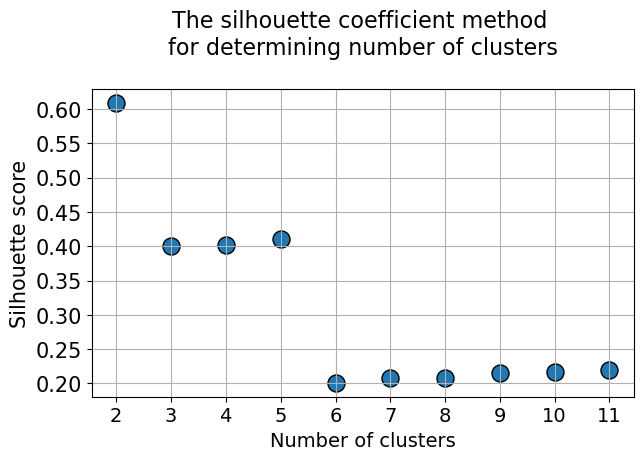

In [90]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

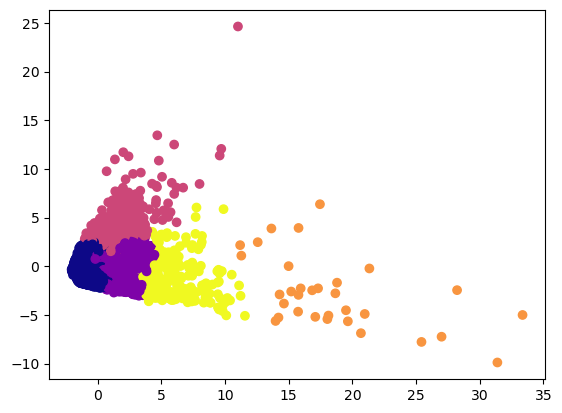

In [91]:
from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=5)
model.fit(X_principal)
yhat = model.predict(X_principal)

# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(X_principal['P1'], X_principal['P2'], c = yhat, cmap = 'plasma')
plt.show()

## DBSCAN

In [69]:
data_pca = X_principal
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 2,min_samples = 2)
dbscan.fit(data_pca)
dbscan_labels = dbscan.labels_

data_out_5 = pd.concat([data_pca, pd.DataFrame({'clusters_kmeans7': labels})], axis = 1)

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 6


In [71]:
neighbors = NearestNeighbors(n_neighbors = 2)
X = data_pca
neighbors.fit(X)

distances, *other = neighbors.kneighbors(X)
distances

array([[0.        , 0.00341022],
       [0.        , 0.02849913],
       [0.        , 0.02479017],
       ...,
       [0.        , 0.02854665],
       [0.        , 0.02392889],
       [0.        , 0.01617395]])

In [72]:
distances = distances[:, 1]
distances = np.sort(distances, axis = 0)
distances

array([1.42006978e-04, 1.42006978e-04, 3.47865269e-04, ...,
       5.12067880e+00, 5.26505085e+00, 1.26402031e+01])

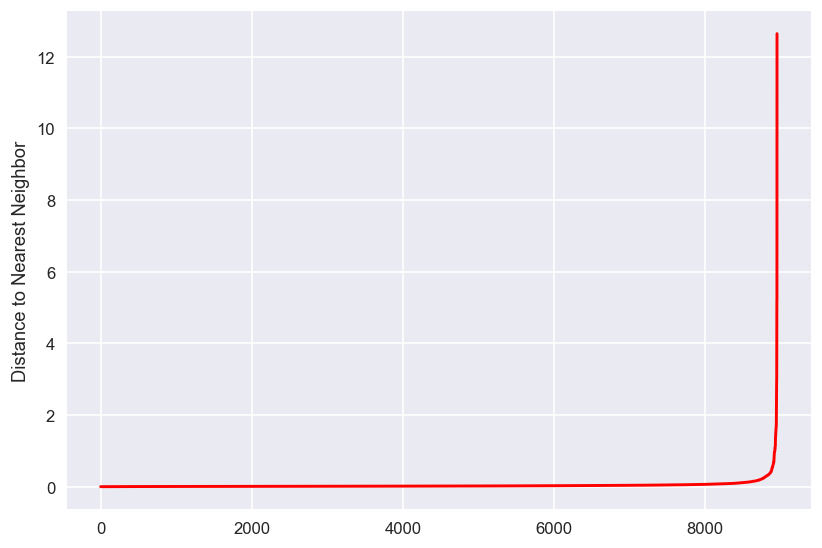

In [73]:
plt.style.use('seaborn')
plt.figure(figsize = (8, 5.5), dpi = 120)
plt.plot(distances, color = 'red')
plt.ylabel('Distance to Nearest Neighbor')
plt.show()

In [74]:
elbow = 8500

In [75]:
epsilon = distances[elbow]
epsilon

0.11460765174983892

In [76]:
from sklearn import metrics

In [100]:
model = DBSCAN(eps = epsilon, min_samples = 20)
model.fit(data_pca)
yhat = model.fit_predict(data_pca)

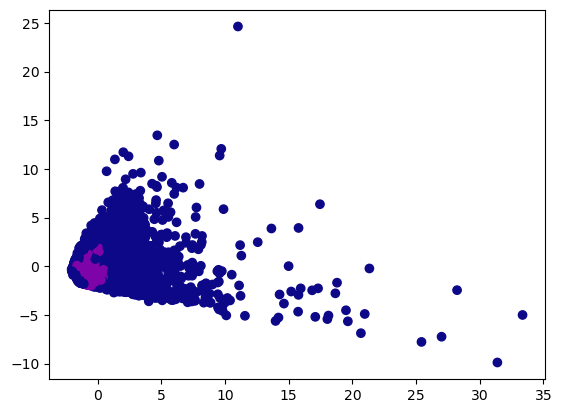

In [104]:
plt.scatter(data_pca.iloc[:,0], data_pca.iloc[:,1], c = yhat, cmap = 'plasma')
plt.show()

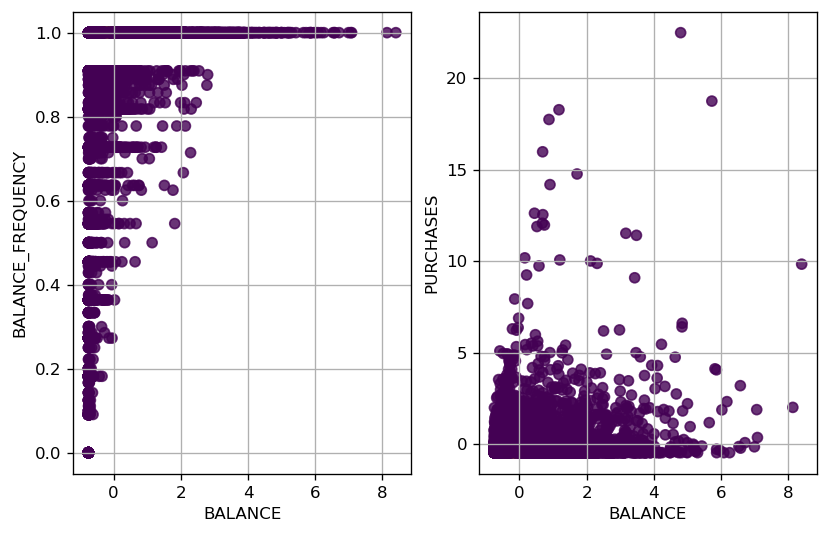

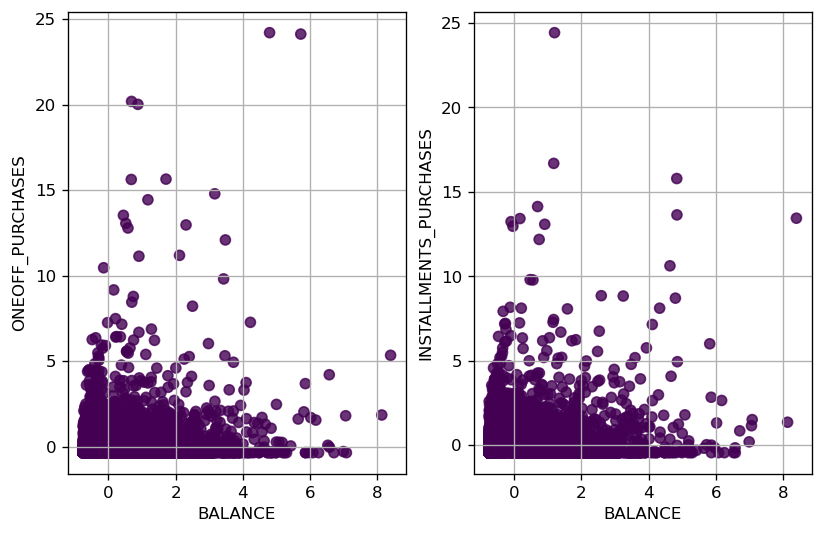

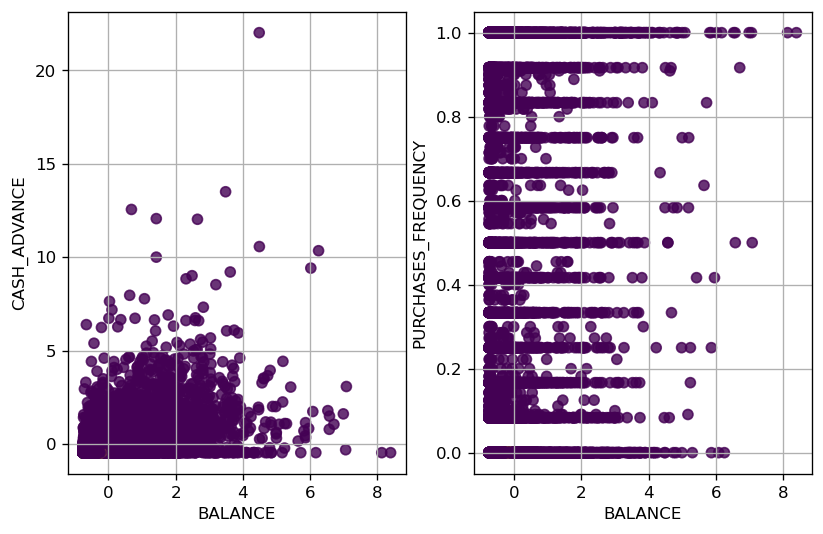

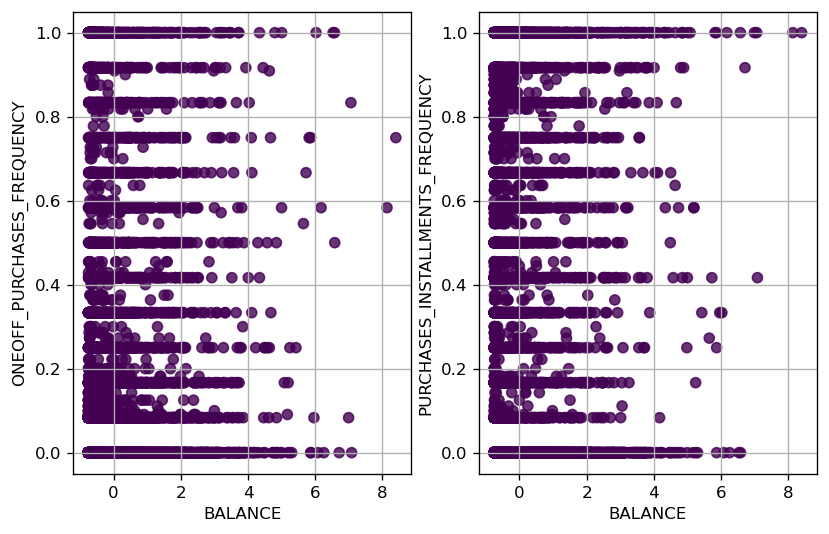

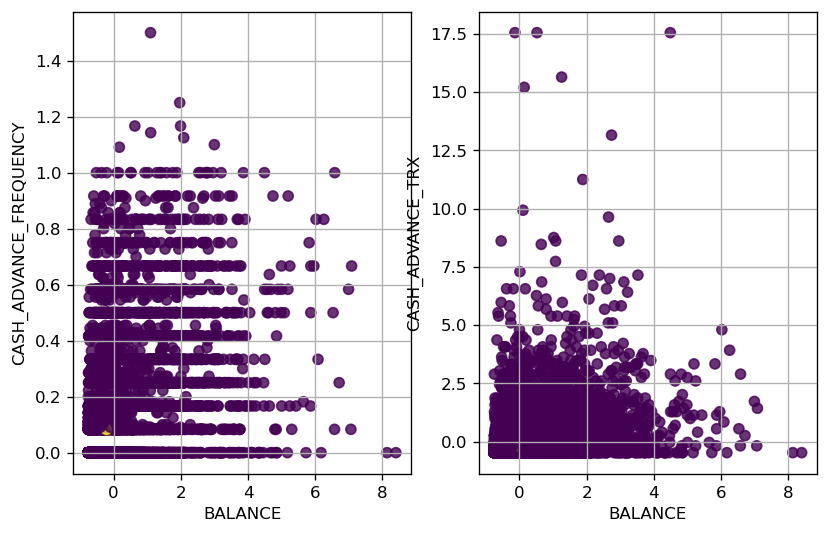

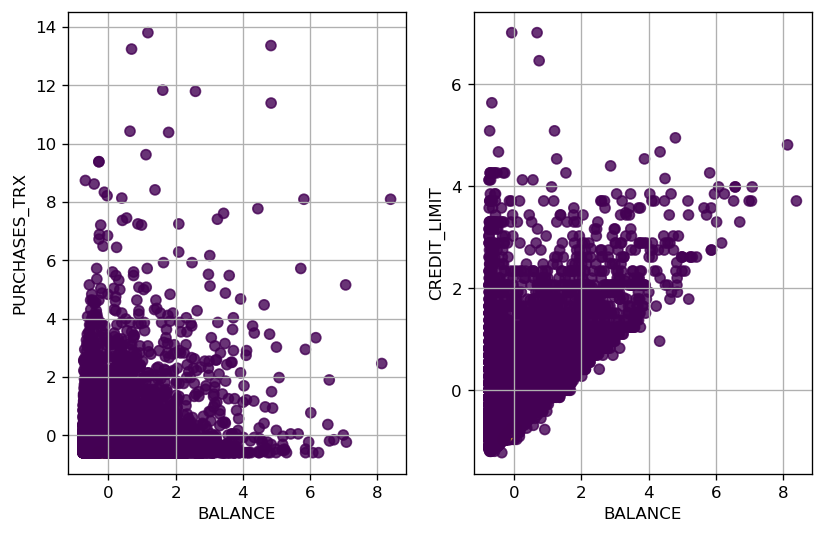

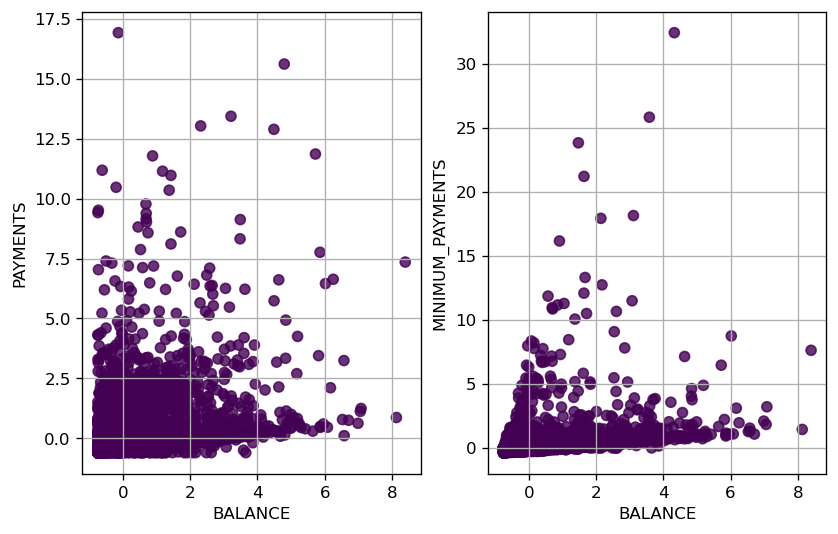

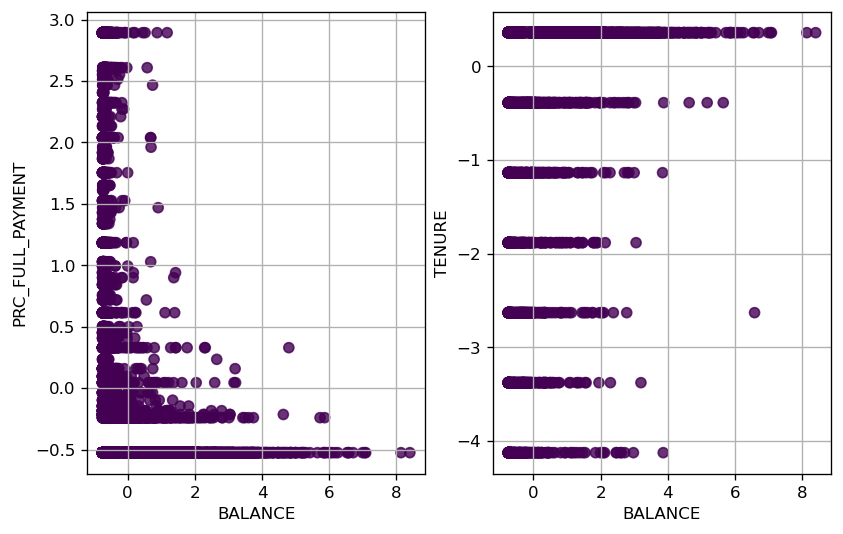

In [79]:
plt.style.use('default')
i = 1
while i < len(data1.columns):
    try:
        fig = plt.figure(figsize = (8, 5), dpi = 120)
        plt.subplot(1,2,1)
        plt.scatter(data1['BALANCE'], data1[data1.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(data1.columns[i])
        plt.grid()
        i += 1
        plt.subplot(1,2,2)
        plt.scatter(data1['BALANCE'],  data1[data1.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(data1.columns[i])
        plt.grid()
        i += 1
    except IndexError:
        break
plt.show()